In [9]:
from envs.citysim import CitySim
from agents.test_agents import RandomAgent

import matplotlib.pyplot as plt
import os
import numpy as np
from pathlib import Path

In [10]:
def sum_ambs_in_config(config):
    s=0
    for key, item in config.items():
        s+=item["available_amb"]
    return s

In [11]:
project_root = Path(os.getcwd()).parent

In [12]:
city = CitySim(
    time_step=300,
    city_config=project_root/"data/city_defaults.yaml",
    city_geometry=project_root/"data/madrid_districts_processed/madrid_districts_processed.shp",
)
sum_ambs_in_config(city.config["hospitals"])

90

In [13]:
agent = RandomAgent(n_hospitals=len(city.hospitals)-1, n_severity_levels=city.severity_levels)

In [14]:
%%time

iterations = 100

obs = city.reset()
total_reward = 0

ambs_record = [np.sum(obs[0][:, 4])]
emergency_record = [obs[1][:,:,0].sum()]
rewards = []
for i in range(iterations):
    action = agent(obs)
    obs, reward, done, info = city.step(action)
    active_emergencies = obs[1][:,:,0].sum()
    total_reward += reward
    ambs_record.append(np.sum(obs[0][:, 4]))
    emergency_record.append(active_emergencies)
    rewards.append(reward)

CPU times: user 1.24 s, sys: 3.83 ms, total: 1.24 s
Wall time: 1.24 s


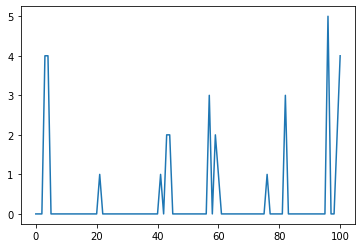

In [15]:
plt.plot(np.array(emergency_record))
plt.show()

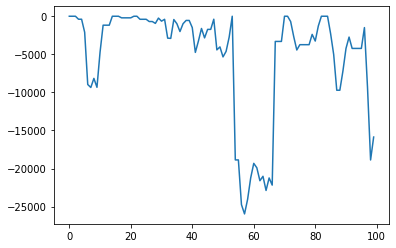

In [16]:
plt.plot(np.array(rewards))